In [12]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

Data Exploration# 

In [2]:
cnx = sqlite3.connect(r'D:\New folder\database.sqlite')

df = pd.read_sql_query('SELECT * FROM Player_Attributes', cnx)  #Data Base took from Sql (given by client) 


In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
#Checking the correlation between variables
#overall_rating_corr = df[['potential','marking','standing_tackle']].corr()
#overall_rating_corr

In [5]:
df.isnull().any() # check Null values in Data set

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [6]:
df.shape # check size 

(183978, 42)

In [7]:
df=df.dropna() # drop NULL values in given data set

In [9]:
df.shape  # Check The Size

(180354, 42)

In [8]:
df.isnull().any()  # recheck Null values in Data set

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking       

In [11]:
df.columns # check the columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [12]:
df.describe()  # check Statatics Function mean, mode,median, Std

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [14]:
df.corr() # correlation overall_rating with  other columns data 

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.007928,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.163099,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.188087,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267


In [15]:
df.corr()["overall_rating"].nlargest(5)     #using Function corr() & find nlargest values in given data set

overall_rating    1.000000
reactions         0.771856
potential         0.765435
short_passing     0.458243
ball_control      0.443991
Name: overall_rating, dtype: float64

# Machine Learning

##Make sure Dataframe doesn't contain Null values & String or Categorical Column (Text)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
input_columns = df[[
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']]

In [18]:
targeted_columns = df['overall_rating']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(input_columns,targeted_columns,test_size=0.30, random_state=8)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(input_columns,targeted_columns,test_size=0.20, random_state=5)  
# check the test size and random _state
#Standard test_size =0.20 & Random_state=3 

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

84.2734932768285 %


# 23.04.21

In [42]:
import sqlite3
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
df = pd.read_csv(r'D:\train data\train.csv')

In [3]:
df.shape 

(891, 12)

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Survived according to Gender# 

Percentage of female who survied:% 74.20382165605095
Percentage of male who survied:% 18.890814558058924


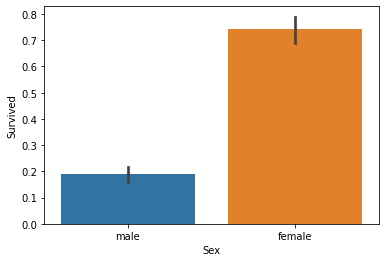

In [8]:

sns.barplot(x = 'Sex', y='Survived', data = df)

print('Percentage of female who survied:%', df['Survived'][df['Sex']== 'female'].value_counts(normalize = True)[1]*100)

print('Percentage of male who survied:%', df['Survived'][df['Sex']== 'male'].value_counts(normalize = True)[1]*100)



In [ ]:
#Survived according to Pclass

Percentage of pclass = 1 who survied: 62.96296296296296
Percentage of pclass = 2 who survied: 47.28260869565217
Percentage of pclass = 3 who survied: 24.236252545824847


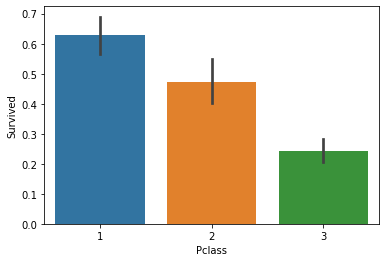

In [9]:
sns.barplot(x = 'Pclass', y='Survived', data = df)
print('Percentage of pclass = 1 who survied:', df['Survived'][df['Pclass']== 1].value_counts(normalize = True)[1]*100)

print('Percentage of pclass = 2 who survied:', df['Survived'][df['Pclass']== 2].value_counts(normalize = True)[1]*100)

print('Percentage of pclass = 3 who survied:', df['Survived'][df['Pclass']== 3].value_counts(normalize = True)[1]*100)



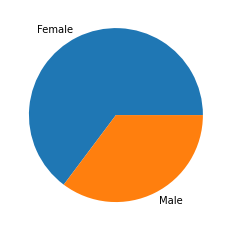

In [10]:
#Survived according to Gender according to sex using pie chart
plt.pie(df['Sex'].value_counts(), labels = ["Female", "Male"])
plt.show()

# Survived according to SibSp

Percentage of SibSp = 1 who survied: 53.588516746411486
Percentage of SibSp = 2 who survied: 46.42857142857143
Percentage of SibSp = 3 who survied: 25.0


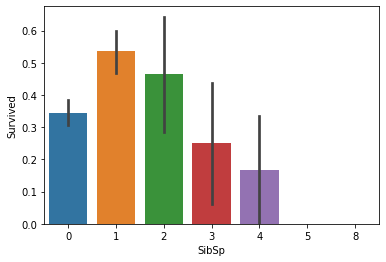

In [11]:
sns.barplot(x = 'SibSp', y='Survived', data = df)
print('Percentage of SibSp = 1 who survied:', df['Survived'][df['SibSp']== 1].value_counts(normalize = True)[1]*100)

print('Percentage of SibSp = 2 who survied:', df['Survived'][df['SibSp']== 2].value_counts(normalize = True)[1]*100)

print('Percentage of SibSp = 3 who survied:', df['Survived'][df['SibSp']== 3].value_counts(normalize = True)[1]*100)



##Survived according to Cabin# Survived according to Cabin

In [12]:
df['CabinBool'] = (df['Cabin'].notnull().astype('int'))


print('Percentage of CabinBool = 1 who survied:', df['Survived'][df['CabinBool']== 1].value_counts(normalize = True)[1]*100)

print('Percentage of CabinBool = 0 who survied:', df['Survived'][df['CabinBool']== 0].value_counts(normalize = True)[1]*100)

Percentage of CabinBool = 1 who survied: 66.66666666666666
Percentage of CabinBool = 0 who survied: 29.985443959243085


<AxesSubplot:xlabel='CabinBool', ylabel='Survived'>

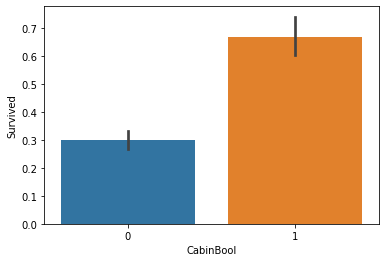

In [13]:
sns.barplot(x = 'CabinBool', y='Survived', data = df)

# Logistic Regression

In [14]:
df.shape

(891, 13)

In [15]:
df = df.dropna()

In [16]:
df.shape

(183, 13)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [18]:
df = df.drop(['Embarked', 'Name', 'Cabin', 'Ticket'], axis = 1)


In [19]:
df['Sex'] = df['Sex'].map({'male' : 0,'female': 1 })

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis = 1),
                                                    df['Survived'],
                                                    test_size=0.30, 
                                                    random_state=8)

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
prediction = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
809,810,1,1,33.0,1,0,53.1000,1
137,138,1,0,37.0,1,0,53.1000,1
496,497,1,1,54.0,1,0,78.2667,1
659,660,1,0,58.0,0,2,113.2750,1
3,4,1,1,35.0,1,0,53.1000,1


In [23]:
accuracy = logmodel.score(X_test, y_test)
print(accuracy*100, '%')



78.18181818181819 %


In [24]:
prediction

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68        22
           1       0.77      0.91      0.83        33

    accuracy                           0.78        55
   macro avg       0.79      0.75      0.76        55
weighted avg       0.79      0.78      0.77        55



In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[13,  9],
       [ 3, 30]], dtype=int64)

# Home work

#use function fillna(){along with mean and mode}, Corr() & Data Exploration

In [46]:
df = pd.read_csv(r'D:\train data\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.groupby('Sex').count()['Survived']


Sex
female    314
male      577
Name: Survived, dtype: int64

In [48]:
df_count = df[['Survived','Sex']].groupby('Sex').count()
df_count

,Survived
Sex,
female,314
male,577


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df['Sex'] = df['Sex'].map({'male' : 0,'female': 1 })

In [52]:
df.corr() #check the correlation with Survived
          # we observed that "sex "column have correlation with Survived

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [31]:
 df.head() # check the t data set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
1,2,1,1,1,38.0,1,0,71.2833,1
3,4,1,1,1,35.0,1,0,53.1000,1
6,7,0,1,0,54.0,0,0,51.8625,1
10,11,1,3,1,4.0,1,1,16.7000,1
11,12,1,1,1,58.0,0,0,26.5500,1


In [34]:
z=df['Cabin'].mode()[0]
z

'B96 B98'

In [36]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True) # using fillna function "cabin fill with along mode"
df['Cabin'].head(10)

0    B96 B98
1        C85
2    B96 B98
3       C123
4    B96 B98
5    B96 B98
6        E46
7    B96 B98
8    B96 B98
9    B96 B98
Name: Cabin, dtype: object

In [37]:
df['Age'].mean()

29.69911764705882

In [39]:
df['Age'].fillna(df['Age'].mean(),inplace=True)  # using fillna function "Age fill with along mean"
df['Age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [40]:
df['AgeGroup'] = df['Age']
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,35.000000
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,B96 B98,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,B96 B98,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,B96 B98,C,14.000000


# Survival rate based on Age

In [43]:
df['AgeGroup'] = np.where((df['Age']<25), "<25", df['AgeGroup'])
df['AgeGroup'] = np.where((df['Age']>=25) & (df['Age']<=50), "25-50", df['AgeGroup'])
df['AgeGroup'] = np.where((df['Age']>50), ">50", df['AgeGroup'])
df['AgeGroup'].head(10)

0      <25
1    25-50
2    25-50
3    25-50
4    25-50
5    25-50
6      >50
7      <25
8    25-50
9      <25
Name: AgeGroup, dtype: object

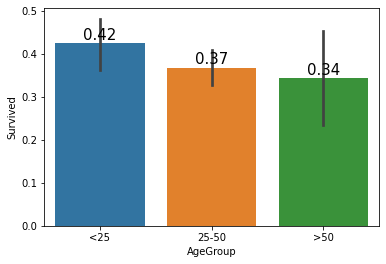

In [44]:
plots=sns.barplot(x = 'AgeGroup', y='Survived', data = df)
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')